In [1]:
#Importamos Librerias
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Leemos data frame
df=pd.read_csv('car_crashes.csv')
print(df.head(5))

   total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA  


In [4]:
#Definimos la función del modelo de predicción

model=smf.ols(formula="total~alcohol", data=df).fit()
model.params

Intercept    5.857776
alcohol      2.032506
dtype: float64

In [5]:
#Agregamos la columna de predicción al dataframe
Form= 5.3857776 + 2.032506*df["alcohol"]
df.insert(loc=0, column='Predicciones', value=Form)
df

,Predicciones,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,16.849111,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,14.582867,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,15.971069,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,17.223093,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.214998,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.125560,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,13.288161,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,15.263757,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,8.623560,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,15.936516,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


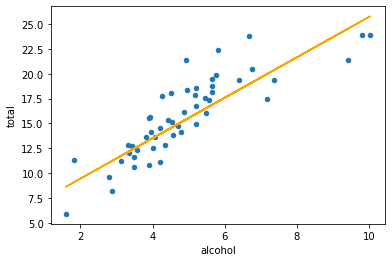

In [6]:
#Graficamos los valores predecidos y los valores reales

df.plot(kind="scatter", x="alcohol", y="total")
plt.plot(pd.DataFrame(df["alcohol"]), pd.DataFrame(df["Predicciones"]), c='orange')
plt.show()

In [7]:
#Calculamos el coeficiente de Determinación R cuadrado
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     130.5
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           2.04e-15
Time:                        16:35:29   Log-Likelihood:                -110.99
No. Observations:                  51   AIC:                             226.0
Df Residuals:                      49   BIC:                             229.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8578      0.921      6.357      0.000       4.006       7.709
alcohol        2.0325      0.178     11.422      0.000       1.675       2.390
==============================================================================
Omnibus:                        1.922   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.705
Skew:                           0.439   Prob(JB):                        0.426
Kurtosis:                       2.824   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
#Calculamos el coeficiente de correlación R 
coef_Correl= np.sqrt(0.727)
coef_Correl

0.8526429498916882